In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [160]:
# Loading data set
data= load_boston()

In [161]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [162]:
# To See the feature names
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [163]:
# Description of the data
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [164]:
X = pd.DataFrame(data.data, columns=[data.feature_names])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [165]:
y= pd.DataFrame(data.target, columns=["MEDV"])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [166]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

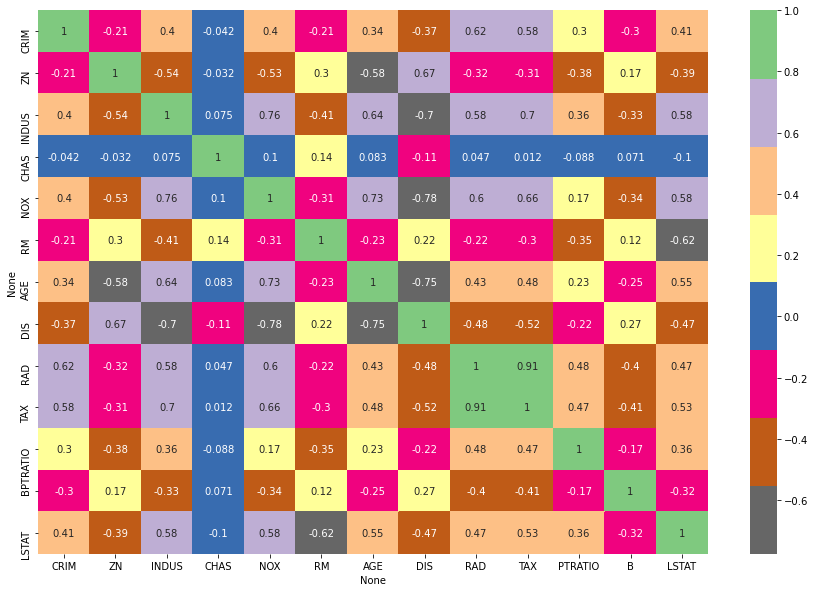

In [167]:
# Plotting the correlation plot
plt.figure(figsize=(15,10))
correlation = X_train.corr()
sns.heatmap(correlation, annot= True, cmap=plt.cm.Accent_r)
plt.show()

In [168]:
# This fuction will remove the first feature if features are highly correlated 
def correlation (data, threshold):
    col_corr= set()      # set of all names of correlated columns
    corr_matrix= data.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i, j]) > threshold:   # taking absolute coeff value
                colname = corr_matrix.columns[i]          # getting column name
                col_corr.add(colname)
    return col_corr

In [169]:
corr_features = correlation(X_train, 0.7)
corr_features

{('AGE',), ('DIS',), ('NOX',), ('TAX',)}

In [170]:
len(corr_features)

4

In [171]:
# It can be seen that AGE, DIS, NOX, TAX are correlated features so we can drop these
X_train_new = X_train.drop(corr_features, axis=1).reset_index(drop=True)
X_test_new= X_test.drop(corr_features, axis=1).reset_index(drop=True)

In [172]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [173]:
X_train_new # Here we can see that correlated columns are dropped

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
0,0.02985,0.0,2.18,0.0,6.430,3.0,18.7,394.12,5.21
1,0.13158,0.0,10.01,0.0,6.176,6.0,17.8,393.30,12.04
2,0.17142,0.0,6.91,0.0,5.682,3.0,17.9,396.90,10.21
3,1.05393,0.0,8.14,0.0,5.935,4.0,21.0,386.85,6.58
4,15.57570,0.0,18.10,0.0,5.926,24.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...
349,0.17120,0.0,8.56,0.0,5.836,5.0,20.9,395.67,18.66
350,0.29916,20.0,6.96,0.0,5.856,3.0,18.6,388.65,13.00
351,0.01501,80.0,2.01,0.0,6.635,4.0,17.0,390.94,5.99
352,11.16040,0.0,18.10,0.0,6.629,24.0,20.2,109.85,23.27
